# **Student Segmentation**
Name: Goh Pin Pin Isaac<br>
Admin Number: P2317623<br>
Class: DAAA/FT/1B/07<br>
<br>

# **Project Objective**
<hr>
Group the students into multiple clusters so that we can cater needs for different students.

# **Background**
<hr>

**The Education System is flawed**. Every student is different. Such as learning and communicating. 

In order to effectively address the diverse needs of our student body, we implement an unsupervised clustering AI that categorizes students into multiple groups based on their unique characteristics, learning styles, and academic requirements. This approach aims to create tailored educational experiences by recognizing and accommodating the distinct needs of each cluster. By grouping students with similar learning preferences and abilities, we can optimize teaching methodologies, provide targeted support, and foster a more personalized and inclusive learning environment. This clustering strategy will enable us to identify and address specific challenges faced by different student groups, promoting a holistic approach to education that embraces individuality and ensures that every student receives the necessary resources and guidance for their academic success.
<br><br>

This is a dataset collected from various **schools**. 
The dataset consists of the marks secured by the students in various subjects and their gender.
<hr>

### Unsupervised learning model performance:
- silhouette_score
- davies_bouldin_score
- calinski_harabasz_score

### Models for unsupervised learning:
- K-Means Clustering (Centroid-based)
- Agglomerative Clustering (Hierarchical-based)
- DBScan Clustering (Density-based)

### STEPS for Unsupervised Learning
1. Getting Data ready (import file)
2. Data Cleaning
3. Feature Engineering (Scaling)
4. Dimension Reduction
5. Silouette Coefficient & Inertia
6. Evaluate Model
7. Improve Model
8. Save Model

In [1]:
# Importing Modules
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Engineering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler

# Data Processing
from sklearn.impute import SimpleImputer
# from sklearn.impute import IterativeImputer
# from sklearn.impute import KNNImputer

# Models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples, adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Others
import pickle
import warnings

In [2]:
# Set the SEED for random (Same Random results when re-ran)
random_state = 17

In [3]:
# Set the Style of the plots
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Importing CSV

In [4]:
dataset = pd.read_csv('./CA2-Dataset/Student_Performance_dataset.csv', sep=',')
dataset.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76


# Exploratory Data Analysis
This is a dataset collected from an environmental company, it contains 3276 records with 10 fields(floats).

- **Student_ID     :** *Primary-key* of each student
- **Gender         :** Student's Specified Gender
- **Age            :** Student's Age
- **English_Score  :** Marks of the students - subject: English
- **Math_Score     :** Marks of the students - subject: Math
- **Science_Score  :** Marks of the students - subject: Science

## Functions used
- df.shape
- df.dtypes
- df.info()
- df.describe()
- df.unique()

### Data Exploration

In [90]:
dataset.shape

(1000, 6)

In [91]:
dataset.dtypes

Student_ID         int64
Gender            object
Age                int64
English_Score    float64
Math_Score       float64
Science_Score      int64
dtype: object

In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     1000 non-null   int64  
 1   Gender         1000 non-null   object 
 2   Age            1000 non-null   int64  
 3   English_Score  971 non-null    float64
 4   Math_Score     967 non-null    float64
 5   Science_Score  1000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


## Notice how we have very little NA values
The **Significance** of the NA values are **very little** as they hold only a **small percentage** of the total rows.
Hence, dropping them is more effecient than trying to impute them.

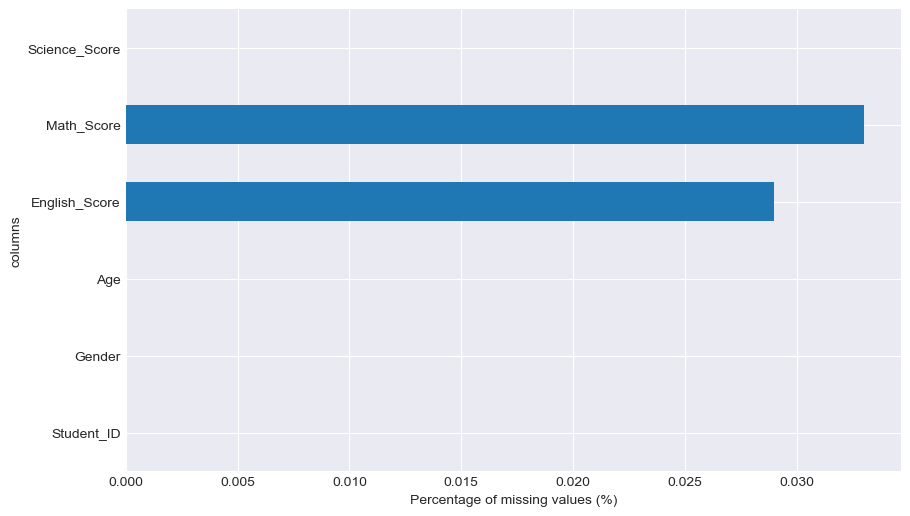

In [93]:
dataset.isna().mean().plot.barh(figsize=(10,6))
plt.ylabel("columns")
plt.xlabel("Percentage of missing values (%)")
plt.show()

### Pie Chart
Shows the Percentage Distribution of the different Genders

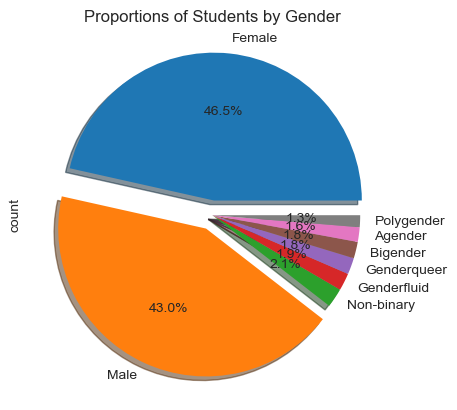

In [9]:
dataset["Gender"].value_counts().plot.pie(
    title="Proportions of Students by Gender",
    autopct="%1.1f%%",
    explode=(0.1, 0.1, 0, 0, 0, 0, 0, 0),
    shadow=True,
    startangle=0
)

plt.show()

# Univariate Analysis
explores each variable in a data set, separately

In [10]:
dataset_eda = dataset.set_index("Student_ID")
dataset_eda.head()

,Gender,Age,English_Score,Math_Score,Science_Score
Student_ID,,,,,
1,Female,18,64.0,56.0,60
2,Female,12,89.0,71.0,97
3,Female,18,69.0,69.0,80
4,Female,17,60.0,72.0,97
5,Male,13,71.0,76.0,76


### Histogram
Show distribution of Age and the different scores

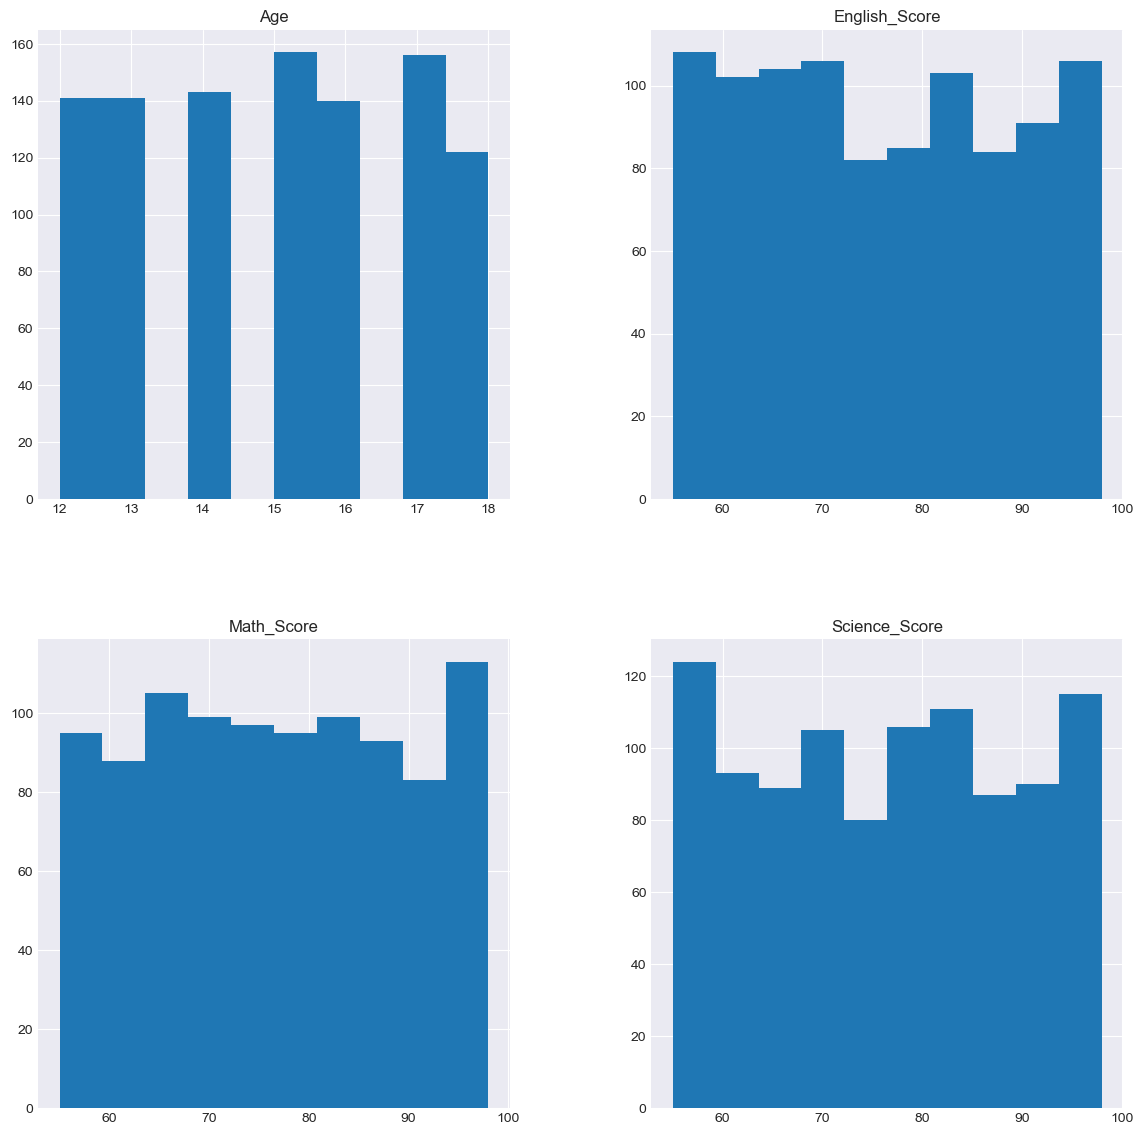

In [11]:
dataset_eda.hist(figsize=(14,14))
plt.show()

### Boxplot (No Outliers)
Age - below 20<br>
Scores - around 50 < x < 95 

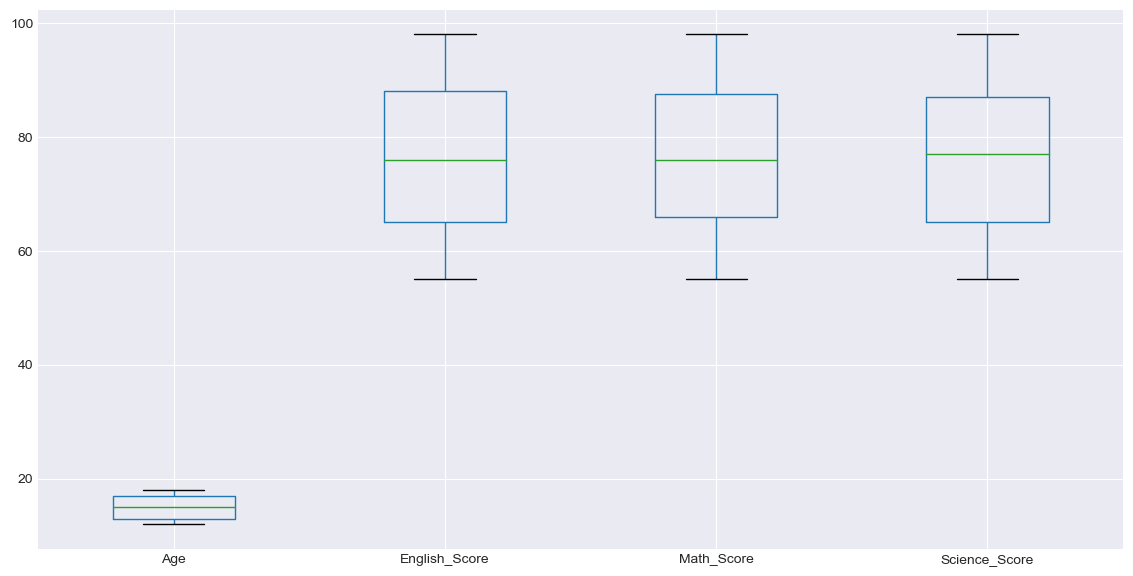

In [12]:
dataset_eda.boxplot(figsize=(14,7))
plt.show()

In [13]:
dataset_eda.describe()

,Age,English_Score,Math_Score,Science_Score
count,1000.000000,971.000000,967.000000,1000.000000
mean,14.970000,76.089598,76.660807,76.370000
std,1.959832,12.767113,12.541226,12.866649
min,12.000000,55.000000,55.000000,55.000000
25%,13.000000,65.000000,66.000000,65.000000
50%,15.000000,76.000000,76.000000,77.000000
75%,17.000000,88.000000,87.500000,87.000000
max,18.000000,98.000000,98.000000,98.000000


# Bivariate Analysis
the analysis of two variables to determine relationships between them.

### HeatMap
Does the students who do better in some subjects do better in others?
- No high correlation between any of the columns

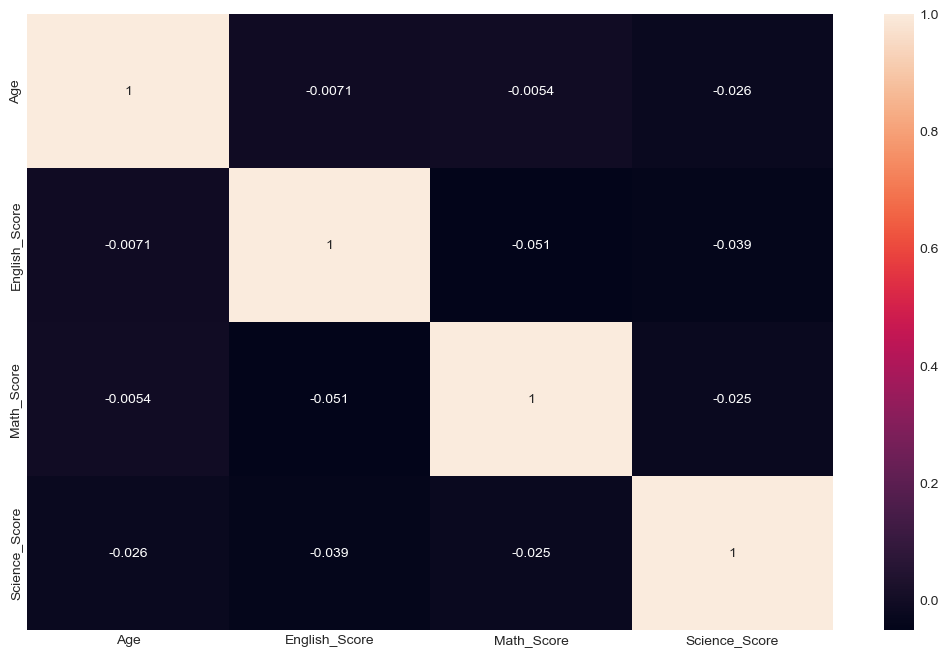

In [14]:
plt.figure(figsize=(13,8))
sns.heatmap(dataset_eda.drop("Gender",axis=1).corr(),annot=True)
plt.show()

### Pairplot
We can't see or tell any clusters forming. This will greatly affect how our clustering model is going to do.

c:\Users\pinpi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


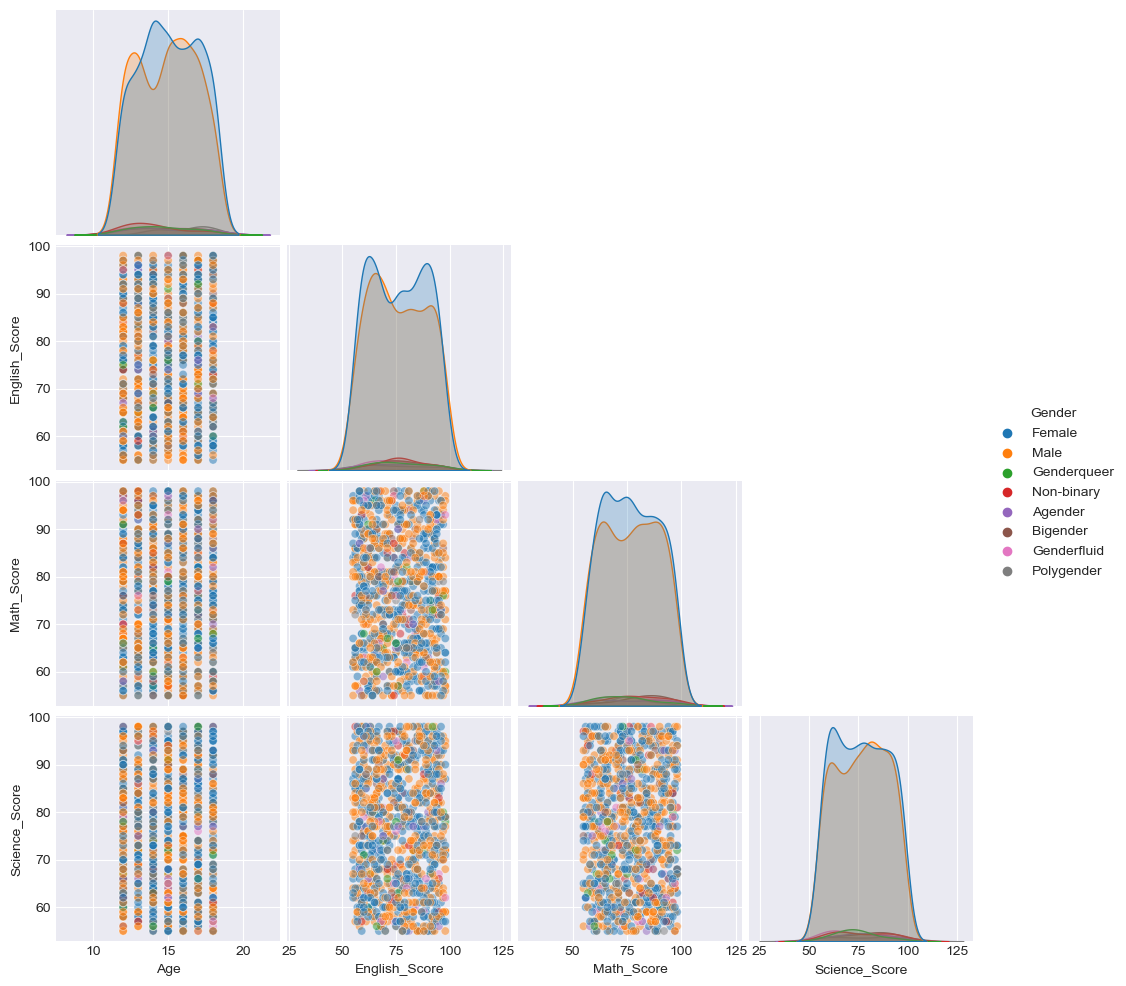

In [15]:
sns.pairplot(data=dataset_eda, hue="Gender", plot_kws={"alpha": 0.5}, corner=True)
plt.show()

### Catplot (Categorical Plot)

c:\Users\pinpi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\pinpi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\pinpi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


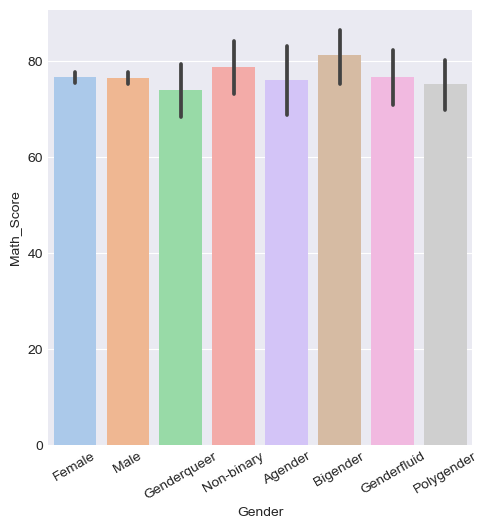

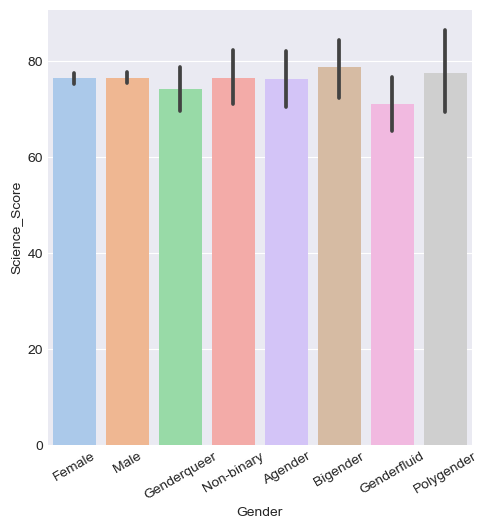

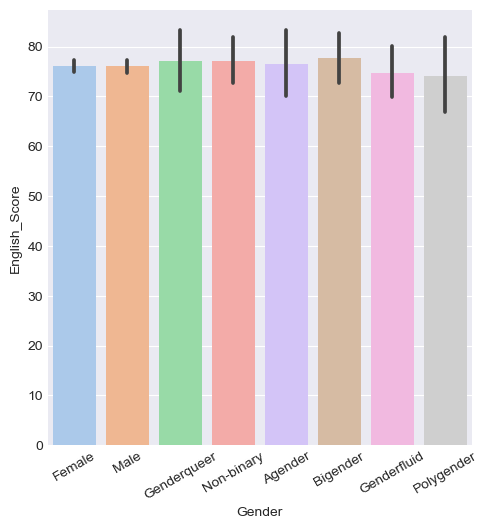

In [16]:
# Math Score
sns.catplot(kind="bar",x="Gender",y="Math_Score",data=dataset_eda,palette="pastel")
plt.xticks(rotation=30)

# Science Score
sns.catplot(kind="bar",x="Gender",y="Science_Score",data=dataset_eda,palette="pastel")
plt.xticks(rotation=30)

# English Score
sns.catplot(kind="bar",x="Gender",y="English_Score",data=dataset_eda,palette="pastel")
plt.xticks(rotation=30)
plt.show()

<hr>

# **Dataset Processing**
we need to prepare and process our data so our model can be better fit with the data

- Imputing
    - SimpleImputer
    - IterativeImputer
    - KNNImputer
- Scaling
    - Z-score Standardization
    - Min-Max Scaling
- Encoding
    - One-Hot Encoding
    - Label / Ordinal Encoding
<hr>

In [5]:
# Importing Dataset
dataset = pd.read_csv('./CA2-Dataset/Student_Performance_dataset.csv', sep=',')

# Setting Index
dataset = dataset.set_index("Student_ID")

# Display Dataset
dataset

,Gender,Age,English_Score,Math_Score,Science_Score
Student_ID,,,,,
1,Female,18,64.0,56.0,60
2,Female,12,89.0,71.0,97
3,Female,18,69.0,69.0,80
4,Female,17,60.0,72.0,97
5,Male,13,71.0,76.0,76
...,...,...,...,...,...
996,Female,14,64.0,55.0,77
997,Genderqueer,14,66.0,60.0,56
998,Male,16,82.0,81.0,74


# Feature Engineering
Average_score - does the average score affect our clustering model

$$ Average Score = \frac{Math Score + Writing Score + Science Score}{3} $$

In [6]:
dataset["Average_Score"] = dataset[["English_Score","Math_Score","Science_Score"]].sum(axis=1)/3
dataset.head()

,Gender,Age,English_Score,Math_Score,Science_Score,Average_Score
Student_ID,,,,,,
1,Female,18,64.0,56.0,60,60.000000
2,Female,12,89.0,71.0,97,85.666667
3,Female,18,69.0,69.0,80,72.666667
4,Female,17,60.0,72.0,97,76.333333
5,Male,13,71.0,76.0,76,74.333333


### **Imputing**
Since there is little correlation with the features, we shouldnt use IterativeImputer or KNNImputer as they replace values from other features.<br>
Hence, we use **SimpleImputer (Method = Mean)**

In [7]:
# All Numerical Features that has missing values
num_cols = ["English_Score", "Math_Score"]

# initialize Imputer
imputer = SimpleImputer(strategy='mean')

# Impute Train Data
dataset.loc[:, num_cols] = imputer.fit_transform(dataset[num_cols])

In [8]:
print("new_features NA values:\n")
print(dataset.isna().sum())

new_features NA values:

Gender           0
Age              0
English_Score    0
Math_Score       0
Science_Score    0
Average_Score    0
dtype: int64


### **Scaling Features**
The data may be different units and may confuse the model
### Methods
- Z-Score Standardization
    - the mean and divide by variance
    - features centered to 0 & variance = 1


$$ z = \frac{x- \mu}{\sigma} $$


- Min-Max Scaler
    - data ranges from -1 to +1

$$ X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} $$
    
<br><br><br>

**Min-Max** - brings down the values between 0 to 1 <br>
**Standardization** - scales down the values in a manner that mean is 0 and standard deviation is 1. <br>

Min-Max is used when the data doesn't have Gaussian distribution whereas Standardization is used on data having Gaussian distribution. <br>
As seen from our EDA, our exam scores doesn't have a Gaussian distribution. Hence, we will be using Standardization to scale. <br>

Note that only **SOME** models are affected by scaling:
- k-means
- DBscan
<hr>

In [9]:
# Defining scaler
scaler = StandardScaler()

# Scaling the dataset
dataset[['English_Score','Math_Score','Science_Score','Average_Score','Age']] = scaler.fit_transform(dataset[['English_Score','Math_Score','Science_Score','Average_Score','Age']])

# Displaying Dataset
dataset.describe()

,Age,English_Score,Math_Score,Science_Score,Average_Score
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-3.659295e-16,1.296740e-16,-1.394440e-15,-3.836931e-16,9.734435e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.516194e+00,-1.677219e+00,-1.757301e+00,-1.661714e+00,-5.299989e+00
25%,-1.005691e+00,-8.819363e-01,-8.648913e-01,-8.841222e-01,-5.069358e-01
50%,1.531510e-02,-7.125600e-03,-1.152900e-15,4.898830e-02,1.274388e-01
75%,1.036321e+00,8.676851e-01,8.387994e-01,8.265803e-01,6.560844e-01
max,1.546825e+00,1.742496e+00,1.731209e+00,1.681932e+00,2.136292e+00


### **Encoding**
Transform data so that it can be properly (and safely) consumed by a different type of system.<br>
Since Machine Learning Models only take in Numerical data to Cluster, we need to convert all our categorical data into numerical.<br>

### One-Hot Encoding
- Process by which categorical data are converted into numerical data for use in machine learning. <br>
Categorical features are turned into binary features that are “one-hot” encoded, meaning that if a feature is represented by that column, it receives a 1. Otherwise, it receives a 0.<br>

### Label / Ordinal Encoding
- Process by which categorical data are converted into numerical data for use in machine learning. <br>
However, it only modifies its column. <br>

Hence, if we dont have Dichotomous Variables (Binary), it will be better to use **One-Hot Encoding**.

In [10]:
dataset.loc[~((dataset["Gender"] == "Female") | (dataset["Gender"] == "Male")),"Gender"] = "Others"

In [11]:
# Getting Dummies
gender_dummies = pd.get_dummies(dataset['Gender'],dtype=int,prefix='Gender')

# Merging dummies with dataset
dataset = pd.concat([dataset, gender_dummies], axis=1)
dataset = dataset.drop(['Gender'], axis=1)

# Display Dataset
dataset

,Age,English_Score,Math_Score,Science_Score,Average_Score,Gender_Female,Gender_Male,Gender_Others
Student_ID,,,,,,,,
1,1.546825,-0.961465,-1.676173,-1.272918,-1.564227,1,0,0
2,-1.516194,1.026742,-0.459251,1.604172,1.149487,1,0,0
3,1.546825,-0.563823,-0.621507,0.282266,-0.224992,1,0,0
4,1.036321,-1.279578,-0.378123,1.604172,0.162682,1,0,0
5,-1.005691,-0.404767,-0.053610,-0.028771,-0.048776,0,1,0
...,...,...,...,...,...,...,...,...
996,-0.495188,-0.961465,-1.757301,0.048988,-1.000338,1,0,0
997,-0.495188,-0.802408,-1.351660,-1.583955,-1.493741,0,0,1
998,0.525818,0.470044,0.352031,-0.184289,0.444626,0,1,0


<hr>

# **Clustering**

### <u>Models:</u>

- K-Means Clustering (Centroid-based)
- Agglomerative Clustering (Hierarchical-based)
- DBSCAN (Density-based)

### <u>Choosing Number of k:</u>
- Elbow Method using Inertia
- Silhouette Analysis
<hr>

In [16]:
warnings.filterwarnings("ignore")
def evaluate(get_dataset):
    dic = {
        'inertia': [],
        'score': [],
        'centroid': [],
        'silhouettes_value': []
    }

    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k, random_state=random_state).fit(get_dataset)
        label = kmeans.predict(get_dataset)

        # Storing Values
        dic['inertia'] += [np.sqrt(kmeans.inertia_)]
        dic['centroid'] += [kmeans.cluster_centers_]
        dic['score'] += [silhouette_score(get_dataset, label)]
        dic['silhouettes_value'] += [silhouette_samples(get_dataset, label)]

    return pd.DataFrame(dic)

In [115]:
evaluate_scores = evaluate(dataset)

### **Inertia** 
The cluster sum of squares

$$\text{Inertia} = \sum^N_{i=1}(x_{i}-C_{k})^2 $$

- $N$ : Number of Datapoints
- $x_{i}$ : Value of each of those Datapoints
- $C_{k}$ : Center of the Centroids

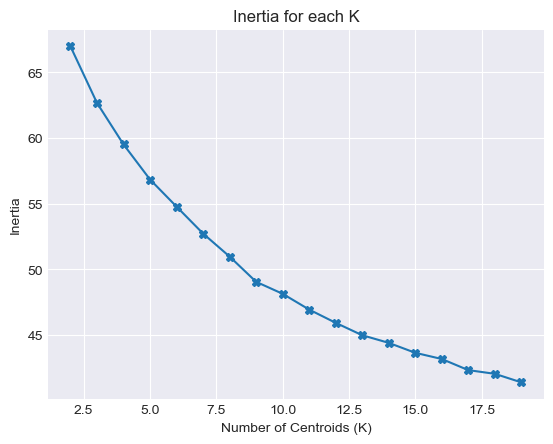

In [116]:
plt.plot(range(2, 20), evaluate_scores.inertia, marker="X")
plt.title("Inertia for each K")
plt.xlabel("Number of Centroids (K)")
plt.ylabel("Inertia")
plt.show()

<u>**Conclusion**</u>

- There isn't any Significant Drop (No Clear Elbow)

### **Silhouette Analysis**
The silhouette score is a numerical value between -1 and 1 that indicates how well a data point belongs to its cluster and how separated it is from other clusters. A high silhouette score means that the data point is close to the average distance of its cluster and far from the nearest neighboring cluster, implying a good clustering.

A low silhouette score means that the data point is far from the average distance of its cluster and close to another cluster, implying a poor clustering. A silhouette score of 0 means that the data point is on the border of two clusters, indicating an ambiguous clustering.

$$s = \frac{b - a}{max\{a,b\}}$$

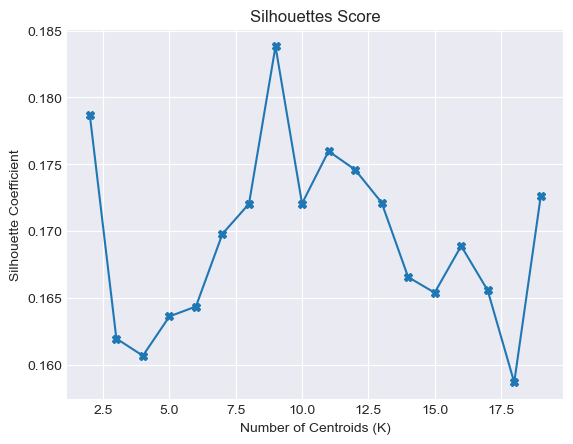

In [117]:
plt.plot(range(2, 20), evaluate_scores.score, marker="X")
plt.title("Silhouettes Score")
plt.xlabel("Number of Centroids (K)")
plt.ylabel("Silhouette Coefficient")
plt.show()

<u>**Conclusion**</u>
- It dropped then rose at k = 9 (0.183)
- This means that k = 9 is the best number of centroids
- However, the silhouette score is still very low. Hence we need to reduce some dimension

<hr>

# **Dimension reduction**

Techniques:
- (Non-Linear) t-Distributed Stochastic Neighbor Embedding (TSNE)
- (Linear) Principal Component Analysis (PCA)
<hr>

### **TSNE**

In [14]:
optimal_perplexity = round(np.sqrt(dataset.shape[0]))
tsne = TSNE(learning_rate=50, perplexity=optimal_perplexity, random_state=random_state)
tsne_features = pd.DataFrame(tsne.fit_transform(dataset))
tsne_features

,0,1
0,28.964256,4.896255
1,-10.689128,33.007545
2,-11.558790,19.215988
3,-4.641994,15.448091
4,6.384262,-16.326738
...,...,...
995,15.770234,9.007322
996,17.130857,18.062757
997,-15.420655,-19.834053
998,22.187714,-15.391292


In [17]:
dimReduction = evaluate(tsne_features)

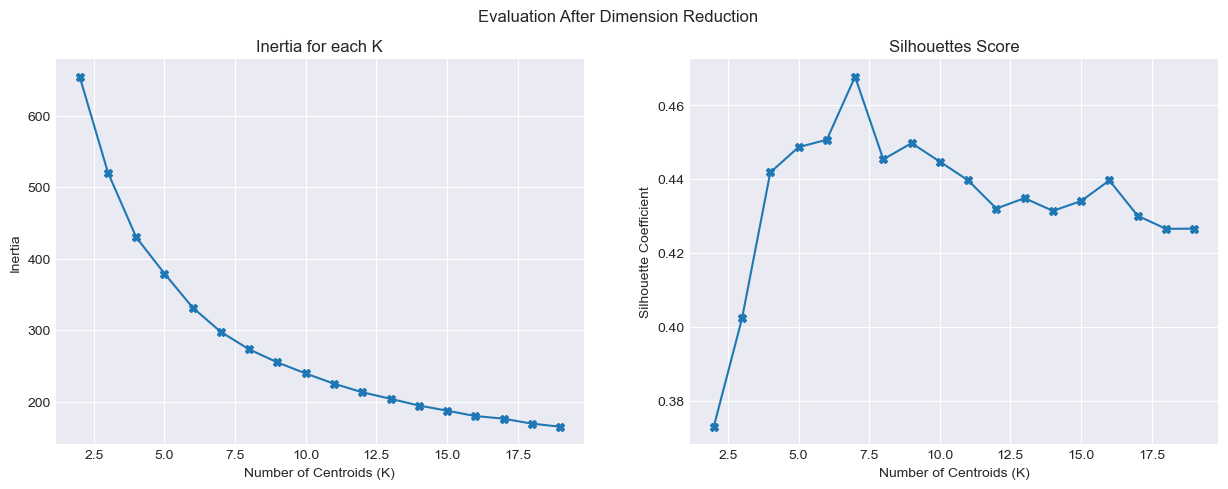

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Evaluation After Dimension Reduction')


ax[0].plot(range(2, 20), dimReduction.inertia, marker="X")
ax[0].set_title('Inertia for each K')
ax[0].set_xlabel("Number of Centroids (K)")
ax[0].set_ylabel("Inertia")


ax[1].plot(range(2, 20), dimReduction.score, marker="X")
ax[1].set_title('Silhouettes Score')
ax[1].set_xlabel("Number of Centroids (K)")
ax[1].set_ylabel("Silhouette Coefficient")

plt.show()

<hr>

# **Model Selection**

### **KMeans (Centroid Based)**

In [162]:
total_score = {
    'Model':[],
    'silhouette':[],
    'davies_bouldin':[],
    'calinski_harabasz':[]
}

Silhouette Score: 0.46773895621299744
Davies Bouldin Score: 0.6841550152160363
Calinski Harabasz Score: 1195.866017689023


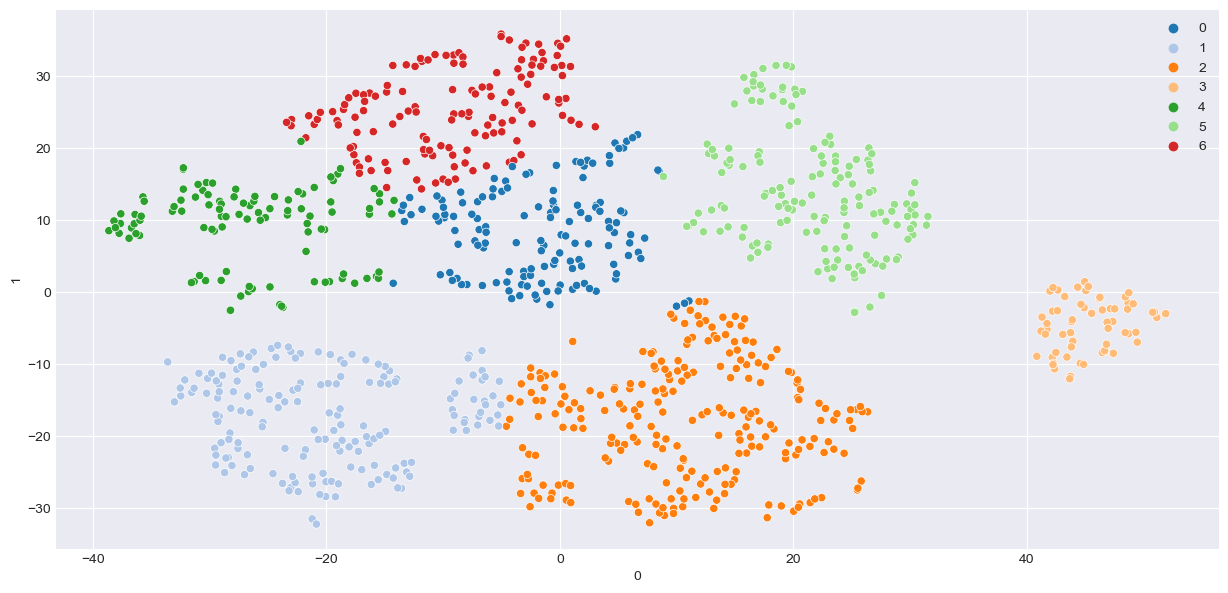

In [163]:
kmeans = KMeans(n_clusters=7, random_state=random_state)
kmeans.fit_predict(tsne_features)
plt.figure(figsize=(15, 7))
sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=kmeans.labels_,
    palette="tab20",
)


silhouette = silhouette_score(tsne_features, kmeans.labels_)
davies_bouldin = davies_bouldin_score(tsne_features, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(tsne_features, kmeans.labels_)

total_score['Model'] += ["KMeans"]
total_score['silhouette'] += [silhouette]
total_score['davies_bouldin'] += [davies_bouldin]
total_score['calinski_harabasz'] += [calinski_harabasz]

print(f'Silhouette Score: {silhouette}')
print(f'Davies Bouldin Score: {davies_bouldin}')
print(f'Calinski Harabasz Score: {calinski_harabasz}')
plt.show()

### **Agglomerative Clustering (Hierarchical Based)**

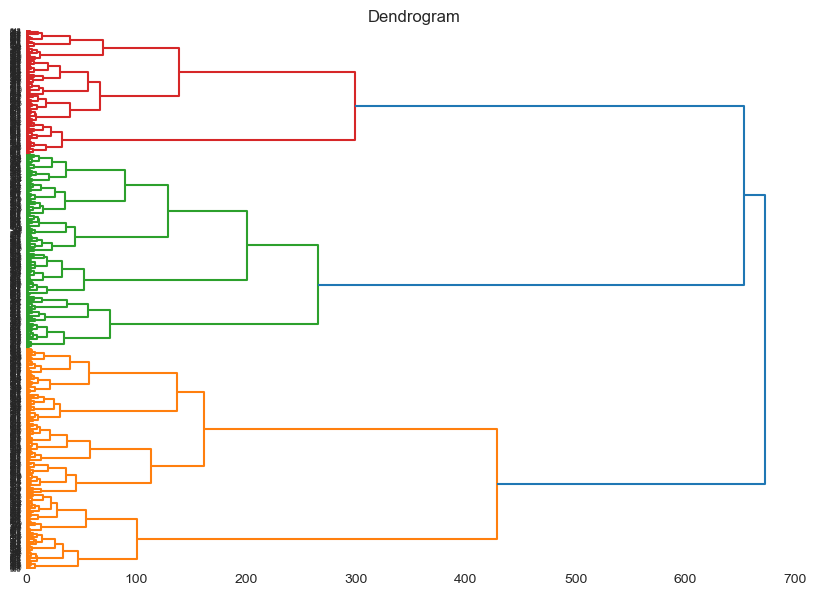

In [164]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(tsne_features,method='ward'), orientation="right")

Silhouette Score: 0.4293022155761719
Davies Bouldin Score: 0.6740904732372209
Calinski Harabasz Score: 1085.7680393183198


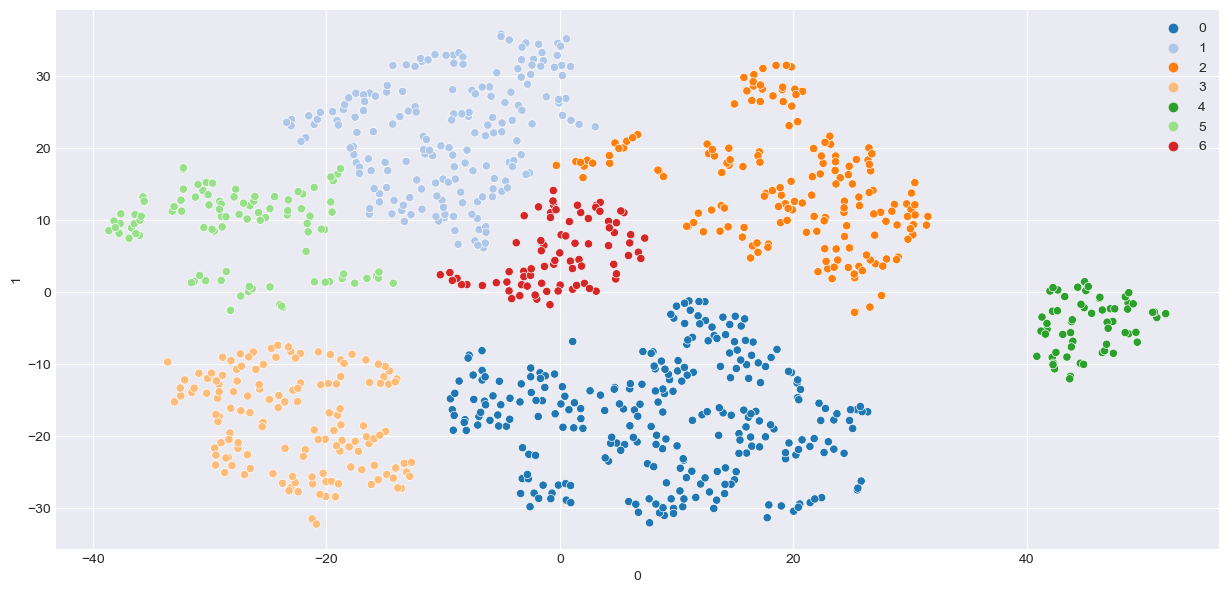

In [165]:
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(tsne_features)

plt.figure(figsize=(15,7))

sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=hierarchical.labels_,
    palette="tab20")

silhouette = silhouette_score(tsne_features, hierarchical.labels_)
davies_bouldin = davies_bouldin_score(tsne_features, hierarchical.labels_)
calinski_harabasz = calinski_harabasz_score(tsne_features, hierarchical.labels_)

total_score['Model'] += ["Hierarchical"]
total_score['silhouette'] += [silhouette]
total_score['davies_bouldin'] += [davies_bouldin]
total_score['calinski_harabasz'] += [calinski_harabasz]

print(f'Silhouette Score: {silhouette}')
print(f'Davies Bouldin Score: {davies_bouldin}')
print(f'Calinski Harabasz Score: {calinski_harabasz}')

plt.show()

### **DBSCAN (Density Based)**

Silhouette Score: 0.05442202463746071
Davies Bouldin Score: 0.9379766143456127
Calinski Harabasz Score: 324.81962685482836


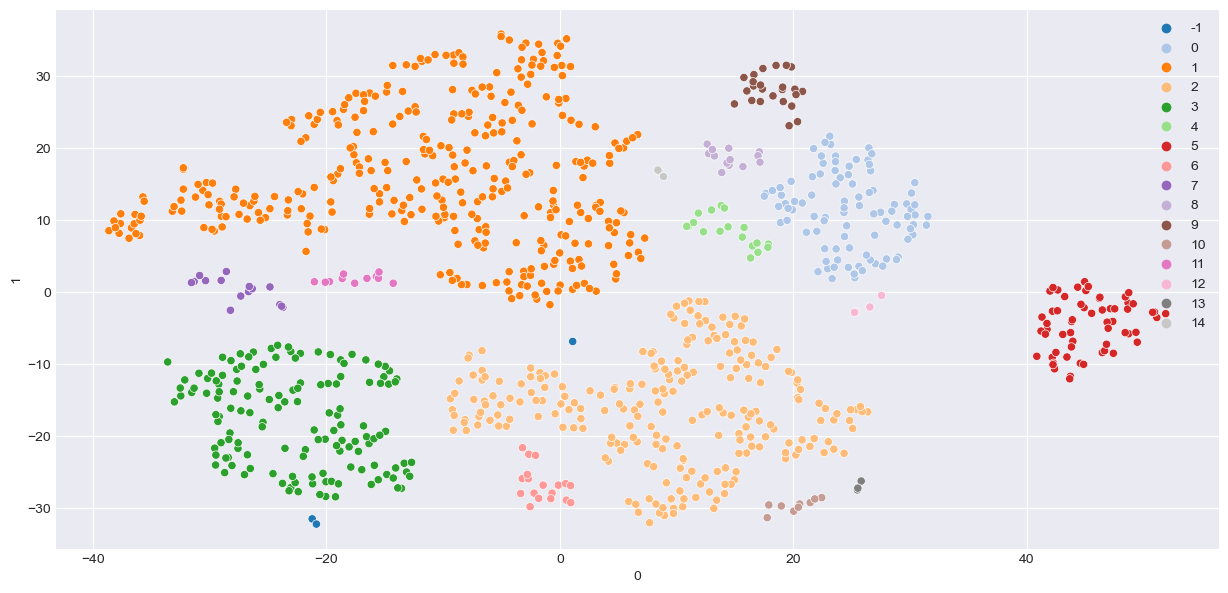

In [166]:
db = DBSCAN(eps=3, min_samples=3, n_jobs=-1)
db.fit_predict(tsne_features)

plt.figure(figsize=(15,7))

sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=db.labels_,
    palette="tab20")

silhouette = silhouette_score(tsne_features, db.labels_)
davies_bouldin = davies_bouldin_score(tsne_features, db.labels_)
calinski_harabasz = calinski_harabasz_score(tsne_features, db.labels_)

total_score['Model'] += ["DBSCAN"]
total_score['silhouette'] += [silhouette]
total_score['davies_bouldin'] += [davies_bouldin]
total_score['calinski_harabasz'] += [calinski_harabasz]

print(f'Silhouette Score: {silhouette}')
print(f'Davies Bouldin Score: {davies_bouldin}')
print(f'Calinski Harabasz Score: {calinski_harabasz}')

plt.show()

<hr>

# <u>Conclusion</u>
KMeans has the highest silhouette and calinski_harabasz and the lowest davies_bouldin.<br>
Hence, KMeans is the best Model to use with this features

In [167]:
results = pd.DataFrame(total_score)
results.set_index("Model")

,silhouette,davies_bouldin,calinski_harabasz
Model,,,
KMeans,0.467739,0.684155,1195.866018
Hierarchical,0.429302,0.674090,1085.768039
DBSCAN,0.054422,0.937977,324.819627


<hr>

# **Model Improvement**

### **Hyper Tuning**

In [168]:
scoring_results = {}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

In [169]:
#KMeans Param Grid
param_grid = {
    'n_clusters': [7],
    'init': ['k-means++', 'random'],
    'max_iter': [150, 350, 550],
    'n_init': [15, 25, 35]
}

# Create an instance of KMeans and GridSearchCV
model = KMeans(random_state=random_state)
km_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)

km_grid_search.fit(tsne_features)

print("Best Parameters:", km_grid_search.best_params_)
print("Best Score:", km_grid_search.best_score_)

Best Parameters: {'init': 'k-means++', 'max_iter': 150, 'n_clusters': 7, 'n_init': 25}
Best Score: 0.4648394167423248


In [170]:
# agglomerative clustering param grid
param_grid = {
    'n_clusters': [7],  # Number of clusters to search
    'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],  # Distance metric
    'linkage': ['ward', 'complete', 'average', 'single']  # Linkage criterion
}
# Create GridSearchCV instance
agc_grid_search = GridSearchCV(AgglomerativeClustering(), param_grid, cv=5, scoring=silhouette_scorer)

# Fit the GridSearchCV instance on your data
agc_grid_search.fit(tsne_features)

# Print the best parameters and best score
print("Best Bandwidth:", agc_grid_search.best_params_)
print("Best Score:", agc_grid_search.best_score_)

Best Bandwidth: {'affinity': 'euclidean', 'linkage': 'average', 'n_clusters': 7}
Best Score: 0.4483267843723297


In [130]:
#DBSCAN Param Grid
param_grid = {
    'eps':[i for i in range(3,20)], 
    'min_samples':[i for i in range(3,20)]
}

# Create an instance of DBSCAN and GridSearchCV
km_grid_search = GridSearchCV(DBSCAN(), param_grid=param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)

km_grid_search.fit(tsne_features)

print("Best Parameters:", km_grid_search.best_params_)
print("Best Score:", km_grid_search.best_score_)

Best Parameters: {'eps': 9, 'min_samples': 12}
Best Score: 0.3457666575908661


### **Conclusion**

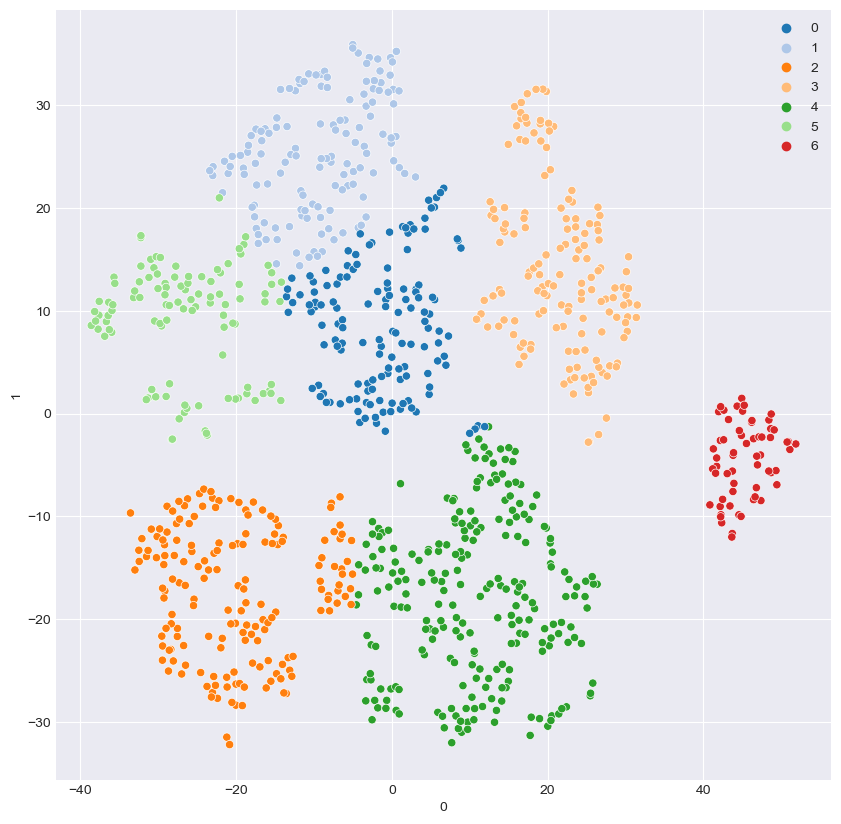

In [18]:
kmeans_final = KMeans(n_clusters=7, random_state=random_state,init='random',max_iter=150, n_init=15).fit(tsne_features)
kmeans_label = kmeans_final.predict(tsne_features)
kmean_df = dataset.copy()
kmean_df["Cluster"] = kmeans_label
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=kmeans_label,
    palette="tab20",
)
plt.show()

In [19]:
cols = ['Age','English_Score','Math_Score','Science_Score',"Average_Score"]
kmean_df[cols] = scaler.inverse_transform(kmean_df[cols]) 

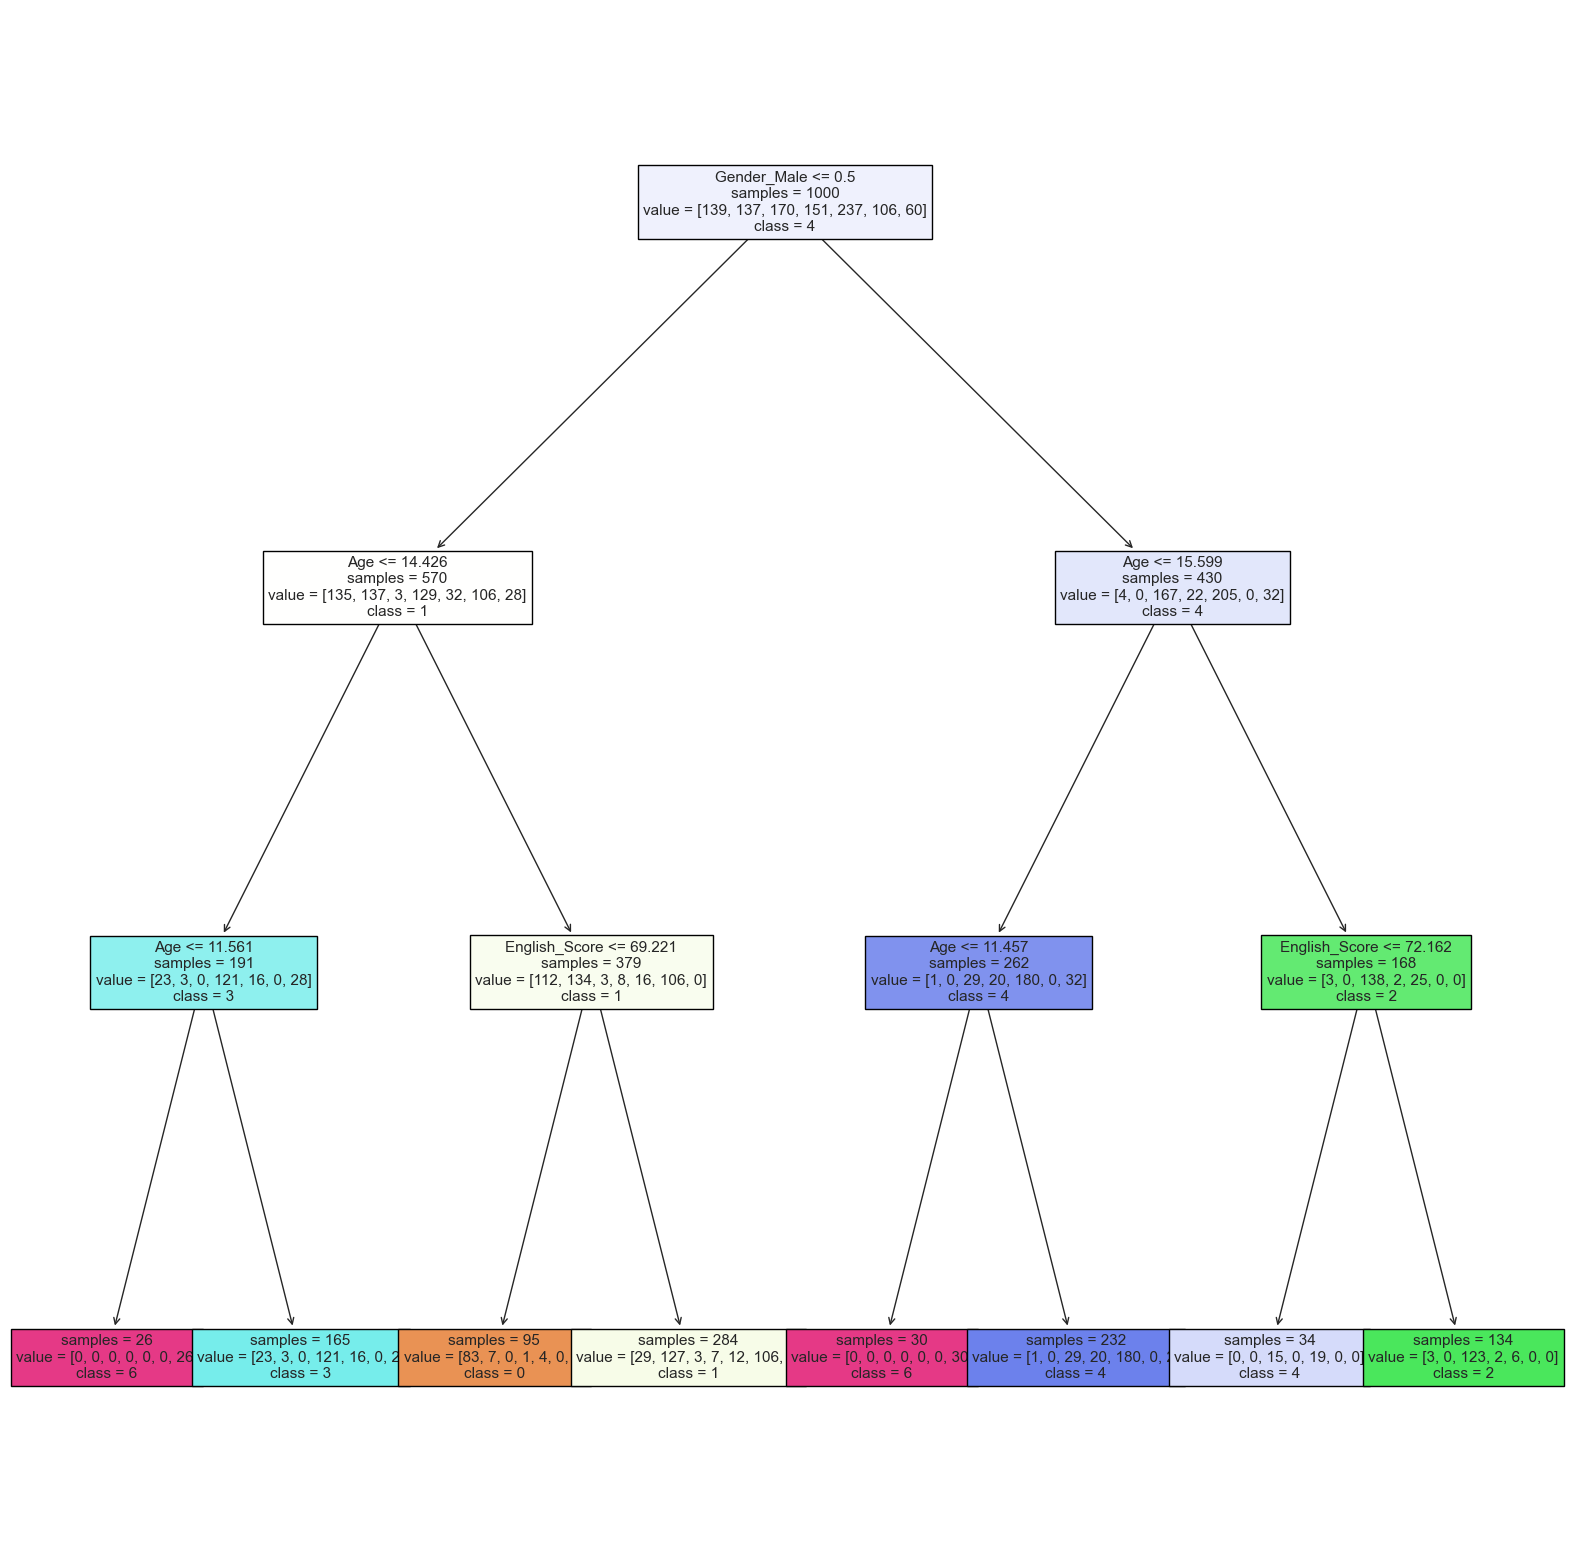

In [20]:
# Defining the model
kmean_df = kmean_df.rename(columns={"Age": "Average_Score", "Average_Score": "Age"})
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
clf.fit(kmean_df.drop(columns='Cluster'), kmean_df['Cluster'])

# Plotting the decision tree
fig, ax = plt.subplots(figsize = (20,20))
plot_tree(
            clf,
            feature_names = kmean_df.drop(columns='Cluster').columns.tolist(),
            class_names= np.unique(kmean_df['Cluster'].values.astype(str)).tolist(),
            impurity=False,
            filled = True, 
            ax = ax, 
            fontsize=11
            )
plt.show()

In [23]:
kmean_df

,Average_Score,English_Score,Math_Score,Science_Score,Age,Gender_Female,Gender_Male,Gender_Others,Cluster
Student_ID,,,,,,,,,
1,95.539600,64.809620,54.814063,62.755237,11.905911,1,0,0,3
2,57.024745,89.316610,70.463939,89.967143,17.221674,1,0,0,1
3,95.539600,69.711018,68.377288,77.464375,14.529275,1,0,0,1
4,89.120458,60.888501,71.507264,89.967143,15.288670,1,0,0,0
5,63.443888,71.671577,75.680564,74.522548,14.874454,0,1,0,4
...,...,...,...,...,...,...,...,...,...
996,69.863030,64.809620,53.770738,75.258005,13.010486,1,0,0,3
997,69.863030,66.770179,58.987363,59.813409,12.043983,0,0,1,3
998,82.701315,82.454653,80.897189,73.051634,15.840957,0,1,0,2


<Axes: xlabel='Science_Score', ylabel='Cluster'>

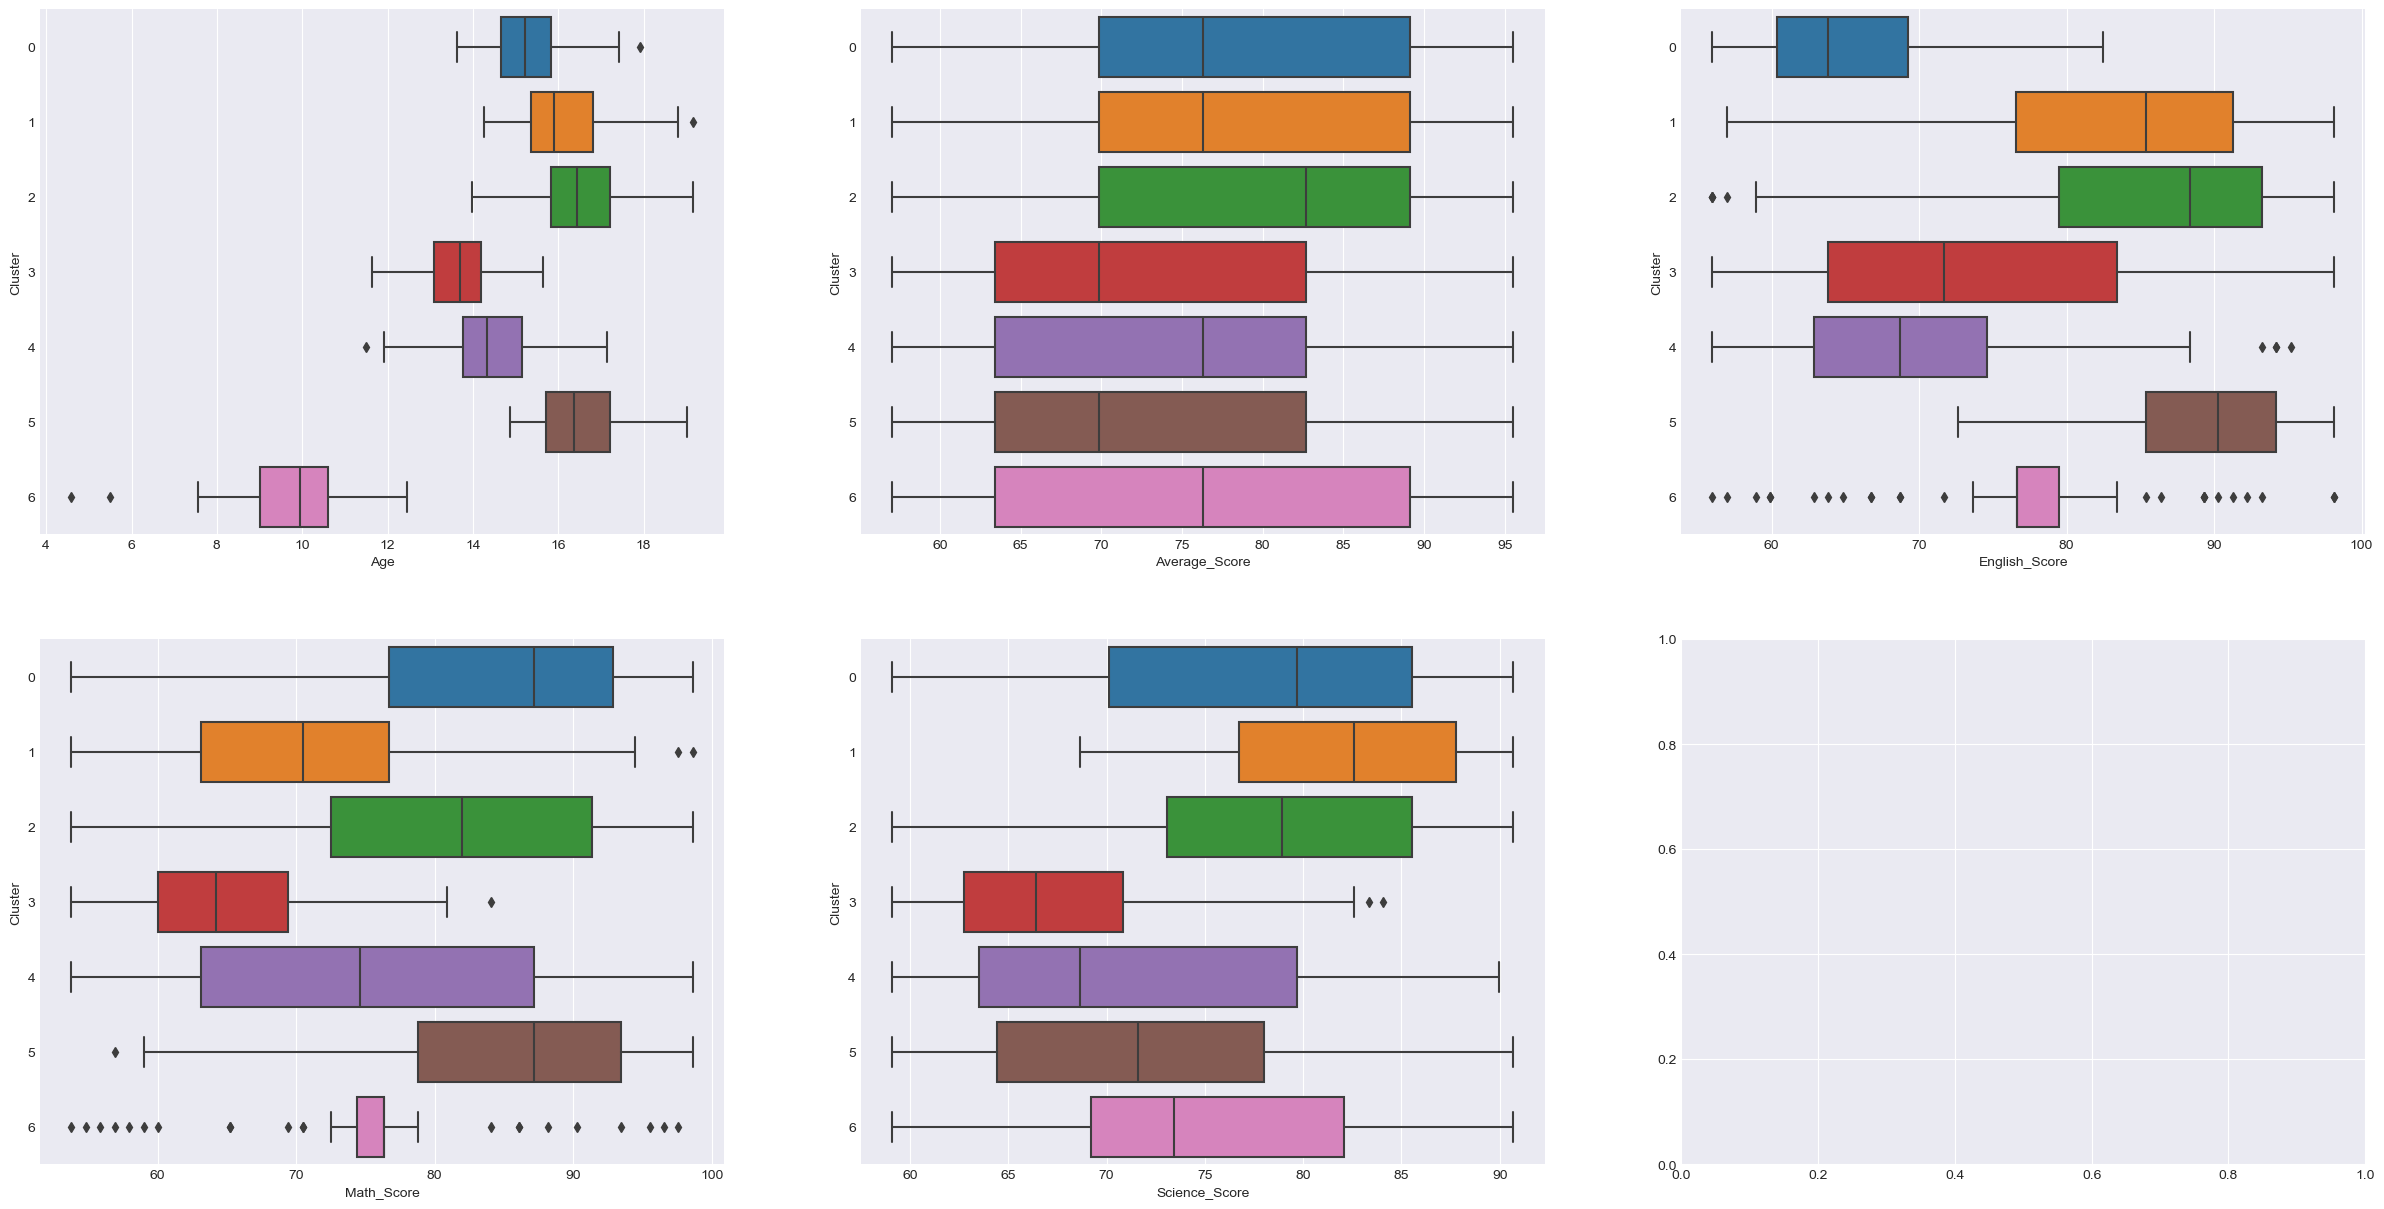

In [34]:
fig, axes = plt.subplots(2,3, figsize=(30,15))
sns.boxplot(y="Cluster", x="Age", data=kmean_df,  orient='h' , ax=axes[0,0])
sns.boxplot(y="Cluster", x="Average_Score", data=kmean_df,  orient='h' , ax=axes[0,1])
sns.boxplot(y="Cluster", x="English_Score", data=kmean_df,  orient='h' , ax=axes[0,2])
sns.boxplot(y="Cluster", x="Math_Score", data=kmean_df,  orient='h' , ax=axes[1,0])
sns.boxplot(y="Cluster", x="Science_Score", data=kmean_df,  orient='h' , ax=axes[1,1])

In [21]:
cluster_centers = kmean_df.groupby('Cluster').mean()
cluster_centers['Cluster Size (% of Total)'] = pd.Series(kmean_df['Cluster']).value_counts() / len(kmean_df['Cluster']) * 100

# Age Swaps With Average Score: Bug
# cluster_centers = cluster_centers.rename(columns={"Age": "Average_Score", "Average_Score": "Age"})
display(pd.DataFrame(cluster_centers).style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: ["background-color: green; color: white" if v else "" for v in x == x.max()]
))

,Average_Score,English_Score,Math_Score,Science_Score,Age,Gender_Female,Gender_Male,Gender_Others,Cluster Size (% of Total)
Cluster,,,,,,,,,
0,77.898503,65.564224,84.702699,77.570196,15.327409,0.841727,0.028777,0.129496,13.900000
1,78.390650,83.778388,70.197396,82.193846,16.084346,0.992701,0.000000,0.007299,13.700000
2,78.283435,85.130240,80.406213,78.835786,16.539843,0.000000,0.982353,0.017647,17.000000
3,73.731520,73.684072,64.991664,67.484566,13.648267,0.728477,0.145695,0.125828,15.100000
4,74.494563,69.301534,75.407627,71.735880,14.427906,0.000000,0.864979,0.135021,23.700000
5,73.799297,89.029925,85.818534,72.239856,16.553459,0.735849,0.000000,0.264151,10.600000
6,76.710115,76.827821,75.468536,75.012852,9.819877,0.400000,0.533333,0.066667,6.000000


# <u>**About Clusters**</u>

### Cluster 0: 
- Worst in English
- Mean Age is 15.3
- Mostly Females with Some Others & Males
- In summary, Cluster 0 represents a group of students with above-average scores, particularly in Math. The cluster has a diverse gender distribution, with a higher percentage of females, and the students are, on average, around 15 years old.

### Cluster 1: 
- Highest Average Score and Highest Science
- Mean Age is 16
- Mostly Females and Some Others
- In summary, Cluster 1 represents a group of students who excels in English and Science, but their average score in Math is lower. The cluster has a predominantly female population, with a very small percentage of others.

### Cluster 2: 
- Quite high in all subjects (Second Highest Average Score)
- Mean Age is 16.5
- Mostly Males and Some Others
- In summary, Cluster 2 represents a group of students with a good overall average score. They perform well in English and Math, with a slightly lower score in Science. The cluster has a predominantly male population, with a small percentage of others.

### Cluster 3: (**Need Most Attension towards**)
- Lowest Average Score, Math & Science
- Mean Age is 13.6
- Mostly Females with Some Others & Males
- In summary, Cluster 3 represents a group of students with a lower overall average score. They show relatively similar performance in English, Math, and Science, with Math having the lowest average score. The cluster has a diverse gender distribution, with the majority being females. They are the second youngest average clusters where they may be at the stage or rebellion.

### Cluster 4: 
- Quite low in all subjects (Second Lowest)
- Mean Age is 14.4
- Mostly Males and Some Others
- In summary, Cluster 4 represents a group of students with a moderate overall average score. They perform well in Math, with slightly lower scores in English and Science. The cluster has a predominantly male population, with a notable percentage of others.

### Cluster 5: 
- Highest English & Math Score
- Mean Age is 16.5 (Oldest)
- Mostly Females and Some Others
- In summary, Cluster 5 represents a group of students with a moderate overall average score. They excel in English and Math, with a slightly lower score in Science. The cluster has a predominantly female population, with a significant percentage of others. The students in this cluster are the oldest in all groups.

### Cluster 6: 
- Highest Average Score and Highest Science
- Mean Age is 9.8 (Youngest)
- Mostly Females and Some Others
- In summary, Cluster 6 represents a group of students with a relatively high overall average score. They show consistent performance in English, Math, and Science. The cluster has a balanced gender distribution, with a notable percentage of others. The students in this cluster are the youngsest in all groups.
<hr>

# **👨🏽‍🏫Pay Attension Too👨🏽‍🏫**
### Depending on which Angle we are looking at, we will cater to different clusters.
- Math Results - Cluster (3)
- Science Results - Cluster (3)
- English Results - Cluster (0)

### However, Cluster (3) has the lowest Average Score than Any of the Clusters. Hence, Cluster 3 needs the MOST attension to excel.
<hr>

# Saving our Model
Two wasys to save and load machine learning models:
1. with `pickle` module
2. with `joblib` module

**Pickle**

In [179]:
import pickle

# Save model to file
pickle.dump(kmeans_final, open("Clustering_KMeans_model.pki","wb"))

In [180]:
# Getting saved model
loaded_pickle_model = pickle.load(open("./CA2-Model/Clustering_KMeans_model.pki","rb"))

Silhouette Score: 0.46773895621299744
Davies Bouldin Score: 0.6841550152160363
Calinski Harabasz Score: 1195.866017689023


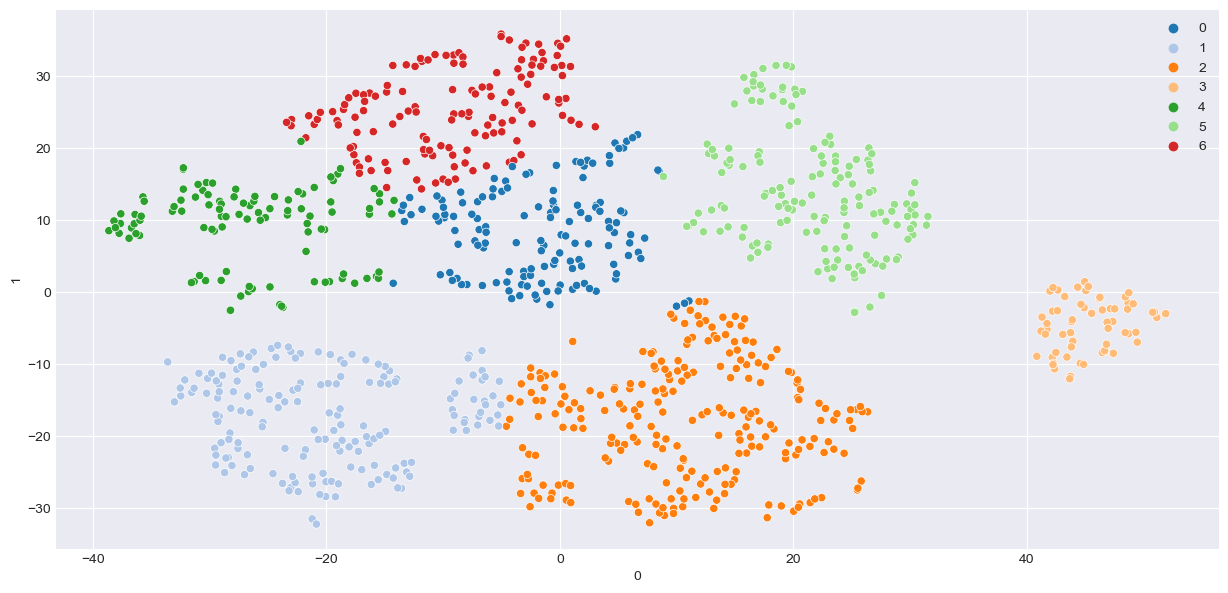

In [181]:
loaded_pickle_model.fit_predict(tsne_features)
plt.figure(figsize=(15, 7))
sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=kmeans.labels_,
    palette="tab20",
)

print(f'Silhouette Score: {silhouette_score(tsne_features, kmeans.labels_)}')
print(f'Davies Bouldin Score: {davies_bouldin_score(tsne_features, kmeans.labels_)}')
print(f'Calinski Harabasz Score: {calinski_harabasz_score(tsne_features, kmeans.labels_)}')
plt.show()

**joblib**

In [182]:
from joblib import dump, load

# Save model to file
dump(kmeans_final, filename="Clustering_KMeans_model.joblib")

['Clustering_KMeans_model.joblib']

In [185]:
# Getting saved model
loaded_joblib_model = load(filename="./CA2-Model/Clustering_KMeans_model.joblib")

Silhouette Score: 0.46773895621299744
Davies Bouldin Score: 0.6841550152160363
Calinski Harabasz Score: 1195.866017689023


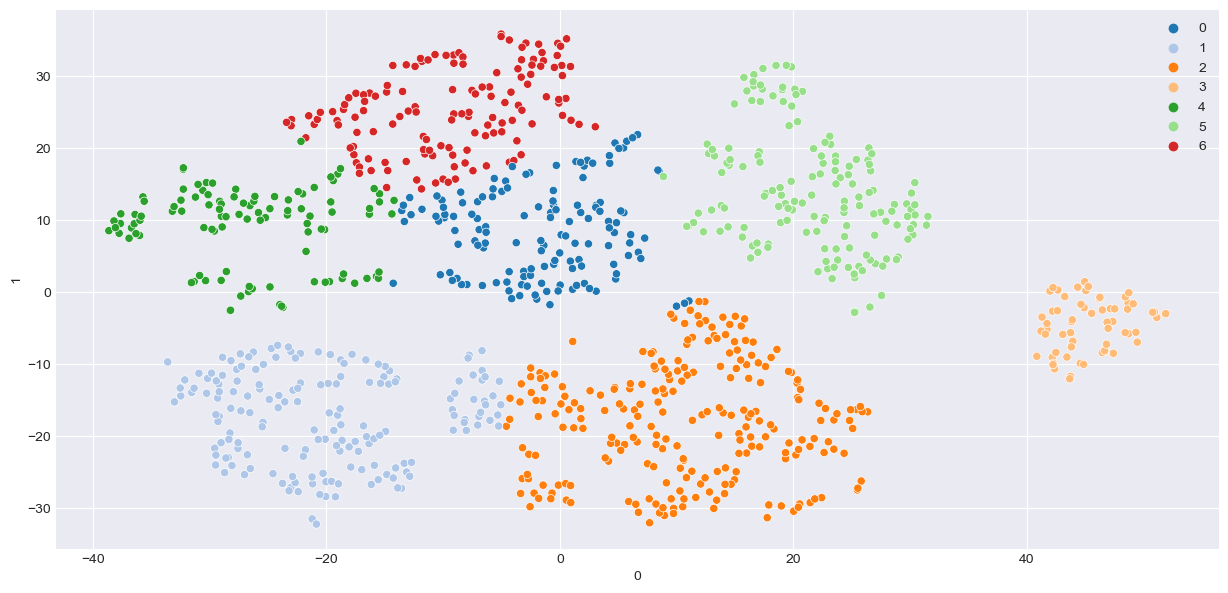

In [186]:
loaded_joblib_model.fit_predict(tsne_features)
plt.figure(figsize=(15, 7))
sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=kmeans.labels_,
    palette="tab20",
)

print(f'Silhouette Score: {silhouette_score(tsne_features, kmeans.labels_)}')
print(f'Davies Bouldin Score: {davies_bouldin_score(tsne_features, kmeans.labels_)}')
print(f'Calinski Harabasz Score: {calinski_harabasz_score(tsne_features, kmeans.labels_)}')
plt.show()